In [ ]:
import pandas as pd
import csv
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

In [ ]:
start = 1
page_size = 10
organization_id = '534fff8ba3a7292c64a77ed4'
api_url = f'<https://www.data.gouv.fr/api/1/organizations/{organization_id}/datasets/?page={start}&page_size={page_size}>'

def get_all_organisations_datasets(initial_url):
    api_url = initial_url
    data = []
    while api_url is not None:
        with urllib.request.urlopen(api_url) as resp:
            response_json = json.load(resp)
        api_url = response_json.get('next_page')
        data = data + response_json.get('data')
    return data

results = get_all_organisations_datasets(api_url)

infos = []
field_names = ["ds_id","ds_title","ds_page","id","title","format","filetype","mime","type","url"]
infos.append(field_names)
for result in results:
    ds_id = result.get('id')
    ds_title = result.get('title')
    ds_page = result.get('page')
    for resource in result.get('resources'):
        infos.append([
            ds_id,
            ds_title,
            ds_page,
            resource.get('id'),
            resource.get('title'),
            resource.get('format'),
            resource.get('filetype'),
            resource.get('mime'),
            resource.get('type'),
            resource.get('url')
        ])

with open('datasets_organization_meteo_france.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
    writer.writerows(infos)

print(len(results))

135


In [32]:
print(result)

{'access_audiences': [], 'access_type': 'open', 'access_type_reason': None, 'access_type_reason_category': None, 'acronym': None, 'archived': None, 'authorization_request_url': None, 'badges': [], 'contact_points': [{'contact_form': None, 'email': 'contact.api@meteo.fr', 'id': '6661de3080af2e6f478a53f7', 'name': 'Support API Météo-France', 'role': 'contact'}], 'created_at': '2025-11-26T16:15:29.306000+00:00', 'deleted': None, 'description': "Ces données sont la mise à disposition pour le Hackathon 2025 des projections climatiques pour les régions d'outre-mer françaises : Guyane, Mayotte, Nouvelle-Calédonie et la Réunion. Ces données sont issues du projet Socle Outre-Mer.\n", 'description_short': None, 'extras': {}, 'featured': False, 'frequency': 'notPlanned', 'frequency_date': None, 'harvest': None, 'id': '692727a13f2dd5338bd09a44', 'internal': {'created_at_internal': '2025-11-26T16:15:29.306000+00:00', 'last_modified_internal': '2025-11-26T16:16:33.779000+00:00'}, 'last_modified': '2

In [ ]:
# 1. Charger le catalogue
try:
    df_cat = pd.read_csv('datasets_organization_meteo_france.csv', encoding='latin-1')
except UnicodeDecodeError:
    df_cat = pd.read_csv('datasets_organization_meteo_france.csv', encoding='cp1252')

# 2. Filtrer les fichiers SYNOP
synop_files = df_cat[
    (df_cat['title'].str.contains('synop', case=False, na=False)) & 
    (df_cat['format'] == 'csv.gz')
].sort_values('title', ascending=False)

# Vérif
if synop_files.empty:
    print("Pas de fichiers trouvés.")
else:
    # Récupération des URLs
    row_2024 = synop_files[synop_files['title'].str.contains("2024")].iloc[0]
    row_2025 = synop_files[synop_files['title'].str.contains("2025")].iloc[0]
    
    url_2024 = row_2024['url']
    url_2025 = row_2025['url']

    print("--- Traitement de 2024 ---")
    # Pandas télécharge, décompresse et parse le fichier directement depuis l'URL
    df_2024 = pd.read_csv(url_2024, sep=';') 
    # On l'enregistre proprement sur le disque
    df_2024.to_csv("synop_2024.csv", index=False, sep=';')
    print("synop_2024.csv créé avec succès !")

    print("--- Traitement de 2025 ---")
    df_2025 = pd.read_csv(url_2025, sep=';')
    df_2025.to_csv("synop_2025.csv", index=False, sep=';')
    print("synop_2025.csv créé avec succès !")

--- Traitement de 2024 ---
synop_2024.csv créé avec succès !
--- Traitement de 2025 ---


C:\Users\riven\AppData\Local\Temp\ipykernel_27676\4111289390.py:34: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025 = pd.read_csv(url_2025, sep=';')


synop_2025.csv créé avec succès !


In [2]:
print(df_2024.head(10))

print(df_2025.head(10))
print(df_2025.info())

         lat        lon  geo_id_wmo     geo_id_wigos             name  \
0  50.136000   1.834000        7005  0-20000-0-07005        ABBEVILLE   
1  41.918000   8.792667        7761  0-20000-0-07761          AJACCIO   
2  42.540667   9.485167        7790  0-20000-0-07790           BASTIA   
3  48.825833  -3.473167        7117  0-20000-0-07117      PLOUMANAC'H   
4 -11.582667  47.289667       61968  0-20000-0-61968       GLORIEUSES   
5 -17.054667  42.712000       61970  0-20000-0-61970     JUAN DE NOVA   
6 -22.344167  40.340667       61972  0-20000-0-61972           EUROPA   
7  48.453833  -4.391167        7110  0-20000-0-07110   BREST-GUIPAVAS   
8 -15.887667  54.520667       61976  0-20000-0-61976         TROMELIN   
9 -20.892167  55.528667       61980  0-20000-0-61980  GILLOT-AEROPORT   

   reference_time  insert_time         validity_time      pmer   tend  ...  \
0             NaN          NaN  2024-01-01T00:00:00Z  100190.0  210.0  ...   
1             NaN          NaN  2024-01-

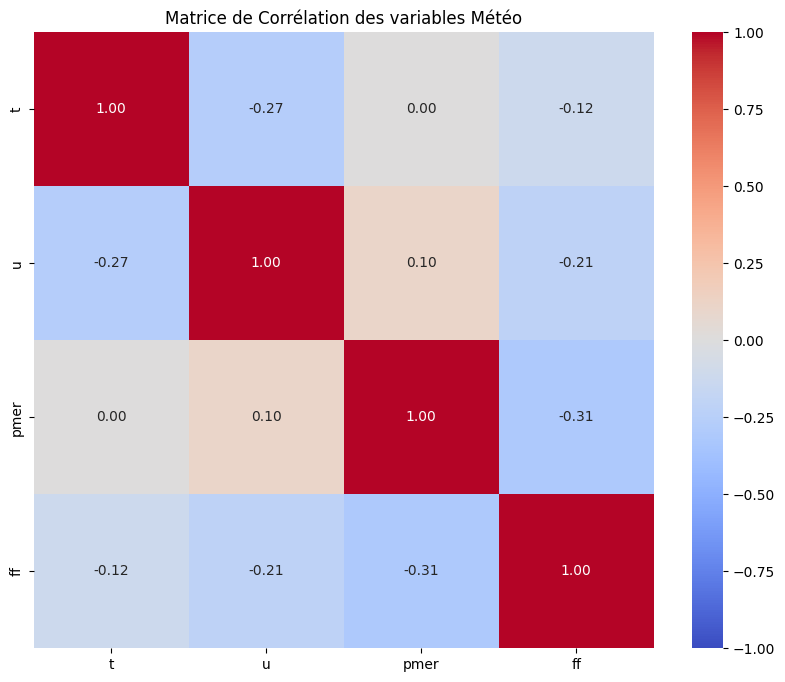

In [ ]:
df_2024 = pd.read_csv("synop_2024.csv", sep=';') 
df_2025 = pd.read_csv("synop_2025.csv", sep=';') 
# t=Température, u=Humidité, pmer=Pression, ff=Vent, rr24=Pluie
colonnes_etude = ['t', 'u', 'pmer', 'ff'] 

# 2. On crée un sous-tableau propre en enlévant les valeurs NAN
df_corr = df_2024[colonnes_etude].dropna()

# 3. Calcul de la matrice de corrélation
# Le résultat est un chiffre entre -1 et 1
matrice = df_corr.corr()

# 4. Affichage du graphique (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matrice, 
            annot=True,       # Affiche les chiffres dans les cases
            cmap='coolwarm',  # Rouge = Lien positif, Bleu = Lien négatif
            vmin=-1, vmax=1,  # Borne l'échelle entre -1 et 1
            fmt=".2f")        # 2 chiffres après la virgule

plt.title("Matrice de Corrélation des variables Météo")
plt.show()